# Digital Assessment #1

## Name : Uzzal Mondal                Reg. No:19MCS0046
    

##### Question: Construct ID3 decision tree to find whether we can go out to play tennis or not. Evaluate the performance using 10 fold cross validation.

In [317]:
import pandas as pd
import numpy as np
import math
from math import log


In [318]:
data = pd.read_csv('play_tennis.csv')

In [319]:
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [320]:

features = data[['outlook','temp','humidity','wind']]

In [322]:
target = data['play']

In [323]:
def target_yes(target):
   total_yes = 0
   for y in range(len(target)): 
       if target[y] == 'Yes':
           total_yes = total_yes + 1

   return total_yes;
            
    

In [325]:
P = target_yes(target)
N = len(target)-P
Total = P + N

In [326]:
Total

14

In [327]:
#features.groupby('outlook')['day'].nunique()
def groupby(features, x , unique ):
    atts = features.groupby(x)[unique].nunique()
    return atts
    
    

In [328]:
def entropy(p,n):
    if p == 0 or n==0 :
        return 0
    else:
        x = (p/(p+n))
        y = (n/(p+n))
        return(-1* (x*math.log2(x)) -1* (y*math.log2(y)))
    

In [329]:
outlook = data.groupby(['outlook','play']).count()[['day']]

In [330]:
outlook

day
outlook  play     
Overcast Yes     4
Rain     No      2
         Yes     3
Sunny    No      3
         Yes     2

In [331]:
Overcast = entropy(4,0)
Rain = entropy(3,2)
Sunny = entropy(2,3)
outlook = Overcast*(4/14) + Rain*(5/14) + Sunny*(5/14)
outlook

0.6935361388961918

In [332]:
Gain_outlook = 1-outlook
Gain_outlook

0.3064638611038082

In [333]:
temp = data.groupby(['temp','play']).count()[['day']]
temp

day
temp play     
Cool No      1
     Yes     3
Hot  No      2
     Yes     2
Mild No      2
     Yes     4

In [334]:
Cool = entropy(3,1)
Hot = entropy(2,2)
Mild = entropy(4,2)
temp = Cool*(4/14) + Hot*(4/14) + Mild*(6/14)
temp

0.9110633930116763

In [335]:
Gain_temp = 1-temp
Gain_temp

0.08893660698832373

In [143]:
humidity = data.groupby(['humidity','play']).count()[['day']]
humidity

day
humidity play     
High     No      4
         Yes     3
Normal   No      1
         Yes     6

In [336]:
High = entropy(3,4)
Normal = entropy(6,1)
humidity = High*(7/14) + Normal*(7/14)
humidity

0.7884504573082896

In [337]:
Gain_humidity = 1-humidity
Gain_humidity

0.21154954269171045

In [144]:
wind = data.groupby(['wind','play']).count()[['day']]
wind

day
wind   play     
Strong No      3
       Yes     3
Weak   No      2
       Yes     6

In [338]:
Strong = entropy(3,3)
Weak = entropy(6,2)
wind = Strong*(6/14) + Weak*(8/14)
wind

0.8921589282623617

In [339]:
Gain_wind = 1-wind
Gain_wind

0.10784107173763835

In [340]:
print('Gain Of Outlook : ',Gain_outlook)
print('Gain Of Temp : ',Gain_temp)
print('Gain Of Humidity : ',Gain_humidity)
print('Gain Of Wind : ',Gain_wind)

Gain Of Outlook :  0.3064638611038082
Gain Of Temp :  0.08893660698832373
Gain Of Humidity :  0.21154954269171045
Gain Of Wind :  0.10784107173763835


In [341]:
df = data
df


,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [375]:
df = df.replace(['Sunny', 'Overcast', 'Rain', 'Hot', 'Mild','Cool','High','Normal','Strong','Weak'], 
                     [40,100,60,50,67,75,43,86,50,75]) 

In [374]:
df

,day,outlook,temp,humidity,wind,play
0,D1,40,50,43,75,No
1,D2,40,50,43,50,No
2,D3,100,50,43,75,Yes
3,D4,60,67,43,75,Yes
4,D5,60,75,86,75,Yes
5,D6,60,75,86,50,No
6,D7,100,75,86,50,Yes
7,D8,40,67,43,75,No
8,D9,40,75,86,75,Yes
9,D10,60,67,86,75,Yes


In [376]:
X = df[['outlook','temp','humidity','wind']]
y = df[['play']]

In [377]:
X

,outlook,temp,humidity,wind
0,40,50,43,75
1,40,50,43,50
2,100,50,43,75
3,60,67,43,75
4,60,75,86,75
5,60,75,86,50
6,100,75,86,50
7,40,67,43,75
8,40,75,86,75
9,60,67,86,75


In [369]:
y

,play
0,No
1,No
2,Yes
3,Yes
4,Yes
5,No
6,Yes
7,No
8,Yes
9,Yes


In [378]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [379]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


#### Accuracy: 0.6666666666666666

In [380]:
feature_cols = ['outlook','temp','humidity','wind']

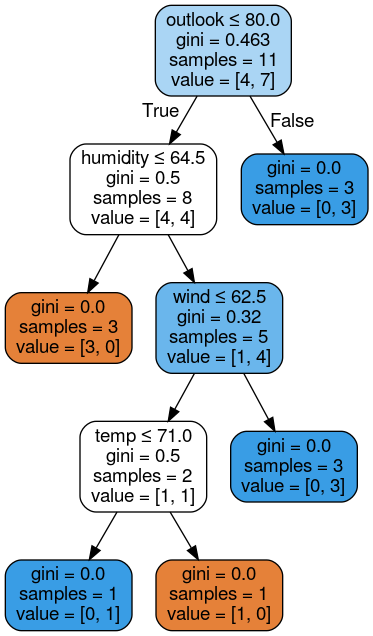

In [381]:


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True,
 feature_names = feature_cols )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [387]:
from sklearn.model_selection import cross_val_score
y

,play
0,No
1,No
2,Yes
3,Yes
4,Yes
5,No
6,Yes
7,No
8,Yes
9,Yes


In [398]:
accuracy = cross_val_score(clf, X, y, scoring='accuracy', cv = 3 )
print(accuracy)

[0.8 1.  1. ]


In [399]:
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 93.33333333333333


In [405]:
#2-fold cross-validation on a dataset with 4 samples
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
for train, test in kf.split(feature_cols):
      print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]
